# group regions

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
download_chandra_obsid 650 evt2
mv -f 650/primary/acisf00650N005_evt2.fits.gz .
gunzip -f acisf00650N005_evt2.fits.gz 
rmdir -p 650/primary


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits       45 Mb  ####################          < 1 s  57100.4 kb/s



## 1.  Create a group of regions

In [3]:
cat << EOM > simple_ds9.reg 
# Region file format: DS9 version 4.0
# Filename: /data/group_regions/acisf00650N005_evt2.fits[EVENTS]
global color=green font="helvetica 10 normal" select=1 highlite=1 edit=1 move=1 delete=1 include=1 fixed=0 source
physical
circle(4106.0,4247.0,34) # tag={Group 1}
circle(3765.5,4395.5,40) # background tag={Group 1}
circle(3921.5,4503.5,40) # background tag={Group 1}
circle(4105.5,4519.5,40) # background tag={Group 1}
circle(4281.5,4483.5,40) # background tag={Group 1}
EOM

[1] 55237
[1]+  Done                    ds9 acisf00650N005_evt2.fits -bin factor 2 -scale log -cmap bb -region simple_ds9.reg -saveimage png ds9_01.png


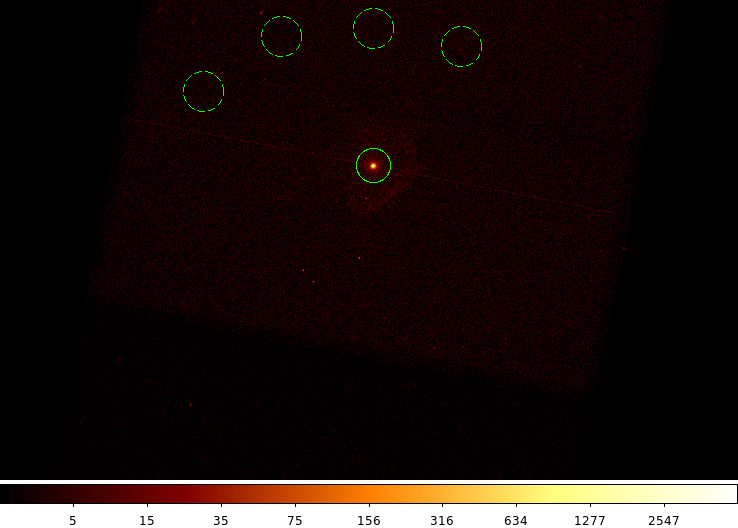

In [4]:
ds9 acisf00650N005_evt2.fits -bin factor 2 -scale log \
  -cmap bb -region simple_ds9.reg -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit


display < ds9_01.png

## 2. Run dmgroupreg

In [5]:
pset dmgroupreg infile=simple_ds9.reg
pset dmgroupreg srcoutfile=simple_src.reg
pset dmgroupreg bkgoutfile=simple_bkg.reg
pset dmgroupreg exclude=no
dmgroupreg mode=h clob+

In [6]:
cat simple_src.reg 

# Group 1
circle(4106.0,4247.0,34)


In [7]:
cat simple_bkg.reg 

# Group 1
circle(3765.5,4395.5,40)+circle(3921.5,4503.5,40)+circle(4105.5,4519.5,40)+circle(4281.5,4483.5,40)


---
## Complex example, multiple groups

## 1. Create several groups of regions

In [8]:
cat << EOM > complex_ds9.reg
# Region file format: DS9 version 4.0
# Filename: /data/group_regions/acisf00650N005_evt2.fits[EVENTS]
global color=green font="helvetica 10 normal" select=1 highlite=1 edit=1 move=1 delete=1 include=1 fixed=0 source
physical
box(3862.1559,3740.5971,154.50773,175.30802,340.91332) # background tag={Group2}
box(4363,4042,173,201,0) # background tag={Group1}
circle(4084.5,4058.5,18) # tag={Group1}
circle(4234.5,3886.5,22) # tag={Group1}
circle(3746.5,3768.5,22) # tag={Group2}
circle(3800.5,4442.5,16) # tag={Group1}
circle(3834.5,4458.5,18) # tag={Group1}
circle(3886.5,4556.5,16) # tag={Group1}
circle(4004.5,4542.5,36) # tag={Group1}
circle(4284.5,4482.5,22) # tag={Group1}
circle(4522.5,4442.5,32) # tag={Group1}
circle(4566.5,4550.5,28) # tag={Group1}
circle(3750.5,4536.5,18) # tag={Group1}
circle(3894.5,4420.5,18) # tag={Group1}
circle(3682.5,4560.5,18) # tag={Group1}
circle(3740.5,4178.5,32) # tag={Group1}
circle(4192.5,3806.5,10) # tag={Group2}
circle(4146.5,3642.5,8) # tag={Group2}
ellipse(3982.5,4032.5,46,20,324.07779) # tag={Group1}
box(4412,4376,101,311,0) # background tag={Group1}
circle(4106.0,4247.0,26) # tag={Group3}
polygon(4073.7819,4324.4495,4174.5,4334.5,4200.5,4268.5,4162.5,4186.5,4090.1562,4142.2854,4049.2205,4181.1743,4069.6884,4285.5605) # background tag={Group3}
-circle(4096.5,4186.5,12) # background tag={Group3}
circle(4288.5,3888.5,16) # tag={Group1}
EOM


[1] 55321
[1]+  Done                    ds9 acisf00650N005_evt2.fits -bin factor 2 -scale log -cmap bb -region complex_ds9.reg -saveimage png ds9_02.png


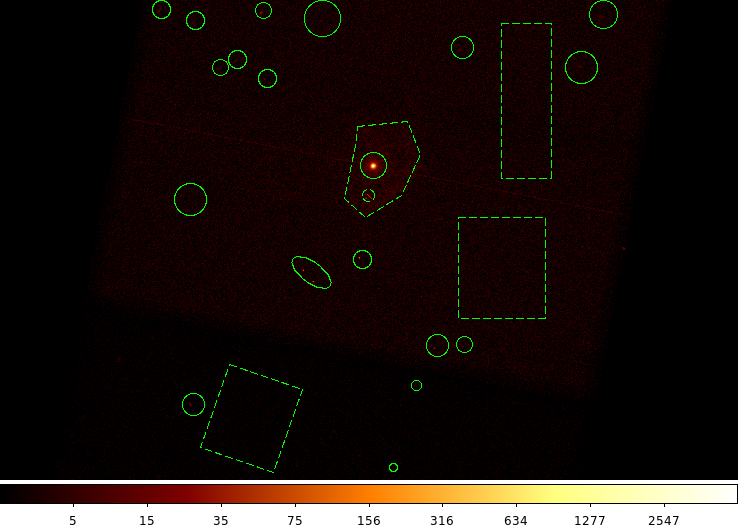

In [9]:
ds9 acisf00650N005_evt2.fits -bin factor 2 -scale log \
  -cmap bb -region complex_ds9.reg -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit


display < ds9_02.png

[1] 55357
[1]+  Done                    ds9 acisf00650N005_evt2.fits -bin factor 2 -scale log -cmap gray -region complex_ds9.reg -regions group "Group1" select -region color green -regions select none -regions group "Group2" select -region color red -regions select none -regions group "Group3" select -region color white -regions select none -saveimage png ds9_03.png


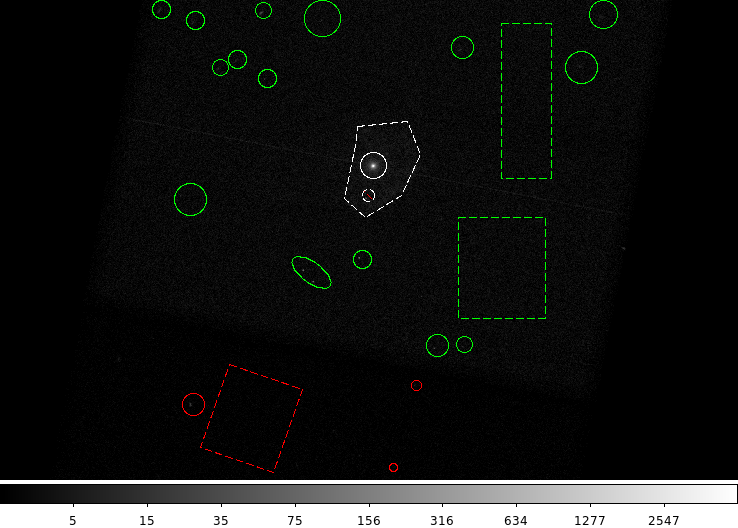

In [10]:
ds9 acisf00650N005_evt2.fits -bin factor 2 -scale log \
  -cmap gray -region complex_ds9.reg \
  -regions group "Group1" select -region color green -regions select none \
  -regions group "Group2" select -region color red  -regions select none\
  -regions group "Group3" select -region color white  -regions select none\
  -saveimage png ds9_03.png &
sleep 10
xpaset -p ds9 quit


display < ds9_03.png

## 3. Run dmgroupreg

In [11]:
pset dmgroupreg infile=complex_ds9.reg
pset dmgroupreg srcoutfile=complex_src.reg
pset dmgroupreg bkgoutfile=complex_bkg.reg
pset dmgroupreg exclude=no
dmgroupreg mode=h clob+

In [12]:
cat complex_src.reg

# Group2
circle(3746.5,3768.5,22)+circle(4192.5,3806.5,10)+circle(4146.5,3642.5,8)
# Group1
circle(4084.5,4058.5,18)+circle(4234.5,3886.5,22)+circle(3800.5,4442.5,16)+circle(3834.5,4458.5,18)+circle(3886.5,4556.5,16)+circle(4004.5,4542.5,36)+circle(4284.5,4482.5,22)+circle(4522.5,4442.5,32)+circle(4566.5,4550.5,28)+circle(3750.5,4536.5,18)+circle(3894.5,4420.5,18)+circle(3682.5,4560.5,18)+circle(3740.5,4178.5,32)+ellipse(3982.5,4032.5,46,20,324.07779)+circle(4288.5,3888.5,16)
# Group3
circle(4106.0,4247.0,26)


In [13]:
cat complex_bkg.reg

# Group2
rotbox(3862.1559,3740.5971,154.50773,175.30802,340.91332)
# Group1
rotbox(4363,4042,173,201,0)+rotbox(4412,4376,101,311,0)
# Group3
polygon(4073.7819,4324.4495,4174.5,4334.5,4200.5,4268.5,4162.5,4186.5,4090.1562,4142.2854,4049.2205,4181.1743,4069.6884,4285.5605)*!circle(4096.5,4186.5,12)


---
## Automatically remove source region from background

In [14]:
cat << EOM > subtract_ds9.reg 
# Region file format: DS9 version 4.0
# Filename: /data/group_regions/acisf00650N005_evt2.fits[EVENTS]
global color=green font="helvetica 10 normal" select=1 highlite=1 edit=1 move=1 delete=1 include=1 fixed=0 source
physical
circle(4111.5,4251.5,102) # tag={Subtract Group}
circle(4113.5,4247.5,184) # background tag={Subtract Group}
EOM


[1] 55445
[1]+  Done                    ds9 acisf00650N005_evt2.fits -bin factor 2 -scale log -cmap bb -region subtract_ds9.reg -saveimage png ds9_04.png


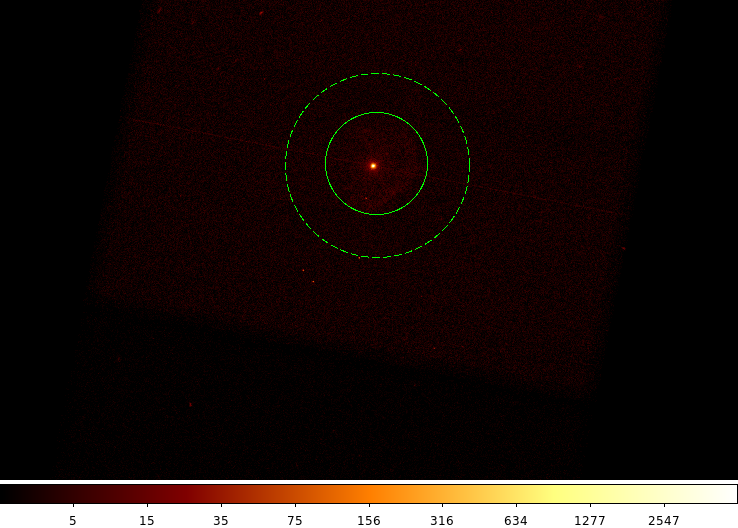

In [15]:
ds9 acisf00650N005_evt2.fits -bin factor 2 -scale log \
  -cmap bb -region subtract_ds9.reg -saveimage png ds9_04.png &
sleep 10
xpaset -p ds9 quit


display < ds9_04.png

In [16]:
pset dmgroupreg infile=subtract_ds9.reg
pset dmgroupreg srcoutfile=subtract_src.reg
pset dmgroupreg bkgoutfile=subtract_bkg.reg
pset dmgroupreg exclude=yes
dmgroupreg mode=h clob+

In [17]:
cat subtract_src.reg

# Subtract Group
circle(4111.5,4251.5,102)


In [18]:
cat subtract_bkg.reg

# Subtract Group
circle(4113.5,4247.5,184)*!circle(4111.5,4251.5,102)


# Cleanup


In [19]:
/bin/rm -f acisf00650N005_evt2.fits
